<a href="https://colab.research.google.com/github/CezarMontenegro/posture_personality_correlation/blob/main/posture_personality_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlação entre postura e traços de personalidade**

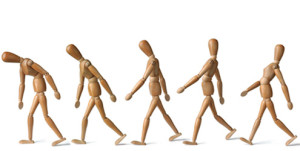

A dor nas costas ocupacional é um distúrbio que comumente afeta a população trabalhadora, resultando em incapacidade, utilização de serviços de saúde e um pesado fardo socioeconômico. Embora a etiologia da dor ocupacional permaneça em grande parte sem solução, existem evidências anedóticas da contribuição da personalidade e da postura para o controle da dor a longo prazo, apontando para uma contribuição direta do eixo mente-corpo.

A classificação tipológica de Myers-Briggs (Myers–Briggs Type Indicator - MBTI) é um instrumento utilizado para identificar características e preferências pessoais. Um conceito fundamental para o MBTI é "Tipo Psicológico". A ideia é que os indivíduos acham certas maneiras de pensar e agir mais fáceis que as outras. O MBTI postula a existência de quatro pares opostos de maneiras de pensar e agir, chamados dicotomias (dimensões)

Neste projeto iremos analizar o padrão postural e os traços de personalidade dos indivíduos e descobrir se existe uma correlação entre eles, também desenvolveremos um modelo que prevê o padrão postural de acordo com seus traços de personalidade.

## **Descrição dos atributos**

AGE - Idade do participante em anos  
HEIGHT - Altura do participante em polegadas  
WEIGHT - Peso do participante em libras  
SEX - Sexo do candidato  
ACTIVITY LEVEL - Nível de atividade do candidato  
PAIN 1 - Nível de dor no pescoço em uma escala de 1 a 10  
PAIN 2 - Nível de dor na torácica em uma escala de 1 a 10  
PAIN 3 - Nível de dor na lombar em uma escala de 1 a 10  
PAIN 4 - Nível de dor em outras parte do corpo em uma escala de 1 a 10  
MBTI - Myers Briggs Personality type  
E - Extrovertism em uma escala de 1 a 26    
I - Introvertism em uma escala de 1 a 26  
S - Sensing em uma escala de 1 a 26  
N - Intuition em uma escala de 1 a 26  
T - Thinking em uma escala de 1 a 26  
F - Feeling em uma escala de 1 a 26  
J - Judging em uma escala de 1 a 26  
P - Perceiving em uma escala de 1 a 26  
POSTURE - ideal posture (A), kyphosis-lordosis (B), flat back (C), sway-back (D)


## **1.0 Importando Bibliotecas e Dataset**

In [1]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
posture_personality_df = pd.read_csv('Myers Briggs Table_S1.csv')

## **2.0 Limpeza/Tratamento dos dados**

In [4]:
posture_personality_df

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,B
93,94,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,B
94,95,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
95,96,28,67,180,Female,Low,0.0,0.0,0.0,0.0,ESFJ,11,10,22,14,8,16,14,8,B


In [5]:
# Delete coluna S No (Serial Number) pois usaremos o index do pandas como referencia.
posture_personality_df.drop('S No', axis=1, inplace=True)

In [6]:
# Renomeando algumas colunas para melhor manipulação dos dados
posture_personality_df.rename(columns={
    'PAIN 1': 'NECK PAIN',
    'PAIN 2': 'THORACIC PAIN',
    'PAIN 3': 'LUMBAR PAIN',
    'PAIN 4': 'OTHER PARTS PAIN',
    'E': 'EXTROVERTISM',
    'I': 'INTROVERTISM',
    'S': 'SENSING',
    'N': 'INTUITION',
    'T': 'THINKING',
    'F': 'FEELING',
    'J': 'JUDGING',
    'P': 'PERCEIVING',
  }, inplace=True)

In [7]:
posture_personality_df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,NECK PAIN,THORACIC PAIN,LUMBAR PAIN,OTHER PARTS PAIN,MBTI,EXTROVERTISM,INTROVERTISM,SENSING,INTUITION,THINKING,FEELING,JUDGING,PERCEIVING,POSTURE
0,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,16,58,100,Male,Moderate,0.0,0.0,0.0,3.0,ESTP,19,2,22,4,19,5,2,20,B
93,45,62,134,Female,Moderate,0.0,4.0,0.0,0.0,ESFJ,11,10,17,9,6,18,13,9,B
94,43,69,188,Male,Moderate,2.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
95,28,67,180,Female,Low,0.0,0.0,0.0,0.0,ESFJ,11,10,22,14,8,16,14,8,B


In [8]:
# Conferindo valores nulos
posture_personality_df.isnull().sum()

AGE                 0
HEIGHT              0
WEIGHT              0
SEX                 0
ACTIVITY LEVEL      0
NECK PAIN           0
THORACIC PAIN       0
LUMBAR PAIN         0
OTHER PARTS PAIN    0
MBTI                0
EXTROVERTISM        0
INTROVERTISM        0
SENSING             0
INTUITION           0
THINKING            0
FEELING             0
JUDGING             0
PERCEIVING          0
POSTURE             0
dtype: int64

In [9]:
# Conferindo linhas duplicadas
posture_personality_df.duplicated().sum()

1

In [10]:
posture_personality_df.drop_duplicates(keep='first', inplace=True)

Nesta sessão iremos transformar váriaveis numéricas em categóricas

In [11]:
posture_personality_df.dtypes

AGE                   int64
HEIGHT                int64
WEIGHT                int64
SEX                  object
ACTIVITY LEVEL       object
NECK PAIN           float64
THORACIC PAIN       float64
LUMBAR PAIN         float64
OTHER PARTS PAIN    float64
MBTI                 object
EXTROVERTISM          int64
INTROVERTISM          int64
SENSING               int64
INTUITION             int64
THINKING              int64
FEELING               int64
JUDGING               int64
PERCEIVING            int64
POSTURE              object
dtype: object

In [12]:
def pain_transform(line):
  if line < 2.5:
    line = 'No Pain'
  elif line < 5:
    line = 'Low Pain'
  elif line < 7.5:
    line = 'Moderate Pain'
  else:
     line = 'High Pain'
  return line

In [13]:
posture_personality_df['NECK PAIN'] = posture_personality_df['NECK PAIN'].apply( pain_transform )
posture_personality_df['THORACIC PAIN'] = posture_personality_df['THORACIC PAIN'].apply( pain_transform )
posture_personality_df['LUMBAR PAIN'] = posture_personality_df['LUMBAR PAIN'].apply( pain_transform )
posture_personality_df['OTHER PARTS PAIN'] = posture_personality_df['OTHER PARTS PAIN'].apply(( pain_transform ))

In [14]:
def personality_transform(line):
  if line < 6.5:
    line = 'Low'
  elif line < 13:
    line = 'Moderate'
  elif line < 19.5:
    line = 'High'
  else:
     line = 'Extreme'
  return line

In [15]:
posture_personality_df['EXTROVERTISM'] = posture_personality_df['EXTROVERTISM'].apply( personality_transform)
posture_personality_df['INTROVERTISM'] = posture_personality_df['INTROVERTISM'].apply( personality_transform)
posture_personality_df['INTUITION'] = posture_personality_df['INTUITION'].apply( personality_transform)
posture_personality_df['SENSING'] = posture_personality_df['SENSING'].apply( personality_transform)
posture_personality_df['THINKING'] = posture_personality_df['THINKING'].apply( personality_transform)
posture_personality_df['FEELING'] = posture_personality_df['FEELING'].apply( personality_transform)
posture_personality_df['JUDGING'] = posture_personality_df['JUDGING'].apply( personality_transform)
posture_personality_df['PERCEIVING'] = posture_personality_df['PERCEIVING'].apply( personality_transform)

In [16]:
posture_personality_df

,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,NECK PAIN,THORACIC PAIN,LUMBAR PAIN,OTHER PARTS PAIN,MBTI,EXTROVERTISM,INTROVERTISM,SENSING,INTUITION,THINKING,FEELING,JUDGING,PERCEIVING,POSTURE
0,53,62,125,Female,Low,No Pain,No Pain,No Pain,No Pain,ESFJ,High,Low,High,Moderate,Moderate,High,High,Low,A
1,52,69,157,Male,High,Moderate Pain,High Pain,Moderate Pain,Low Pain,ISTJ,Low,High,High,Moderate,Extreme,Low,High,Moderate,B
2,30,69,200,Male,High,No Pain,No Pain,No Pain,No Pain,ESTJ,High,Low,High,Moderate,High,Moderate,Moderate,Moderate,A
3,51,66,175,Male,Moderate,High Pain,High Pain,High Pain,No Pain,ISTJ,Low,High,Extreme,Low,High,Moderate,High,Low,D
4,45,63,199,Female,Moderate,Low Pain,Moderate Pain,No Pain,No Pain,ENFJ,High,Moderate,Extreme,Low,Moderate,High,High,Low,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,16,69,130,Female,Moderate,Moderate Pain,No Pain,Moderate Pain,Moderate Pain,ENFJ,High,Low,Moderate,High,Low,Extreme,Moderate,Moderate,B
92,16,58,100,Male,Moderate,No Pain,No Pain,No Pain,Low Pain,ESTP,High,Low,Extreme,Low,High,Low,Low,Extreme,B
93,45,62,134,Female,Moderate,No Pain,Low Pain,No Pain,No Pain,ESFJ,Moderate,Moderate,High,Moderate,Low,High,High,Moderate,B
94,43,69,188,Male,Moderate,No Pain,No Pain,No Pain,No Pain,ENFP,Moderate,Moderate,Moderate,High,Low,High,Low,Extreme,A


## **3.0 Análise Exploratória (EDA)**

Iremos fazer uma série de gráficos de categorias paralélas para observar se existe correlação entre traço de personalidade e postura

In [ ]:
plot = px.parallel_categories(posture_personality_df, dimensions=['POSTURE', 'MBTI'])
plot.show(renderer='png')

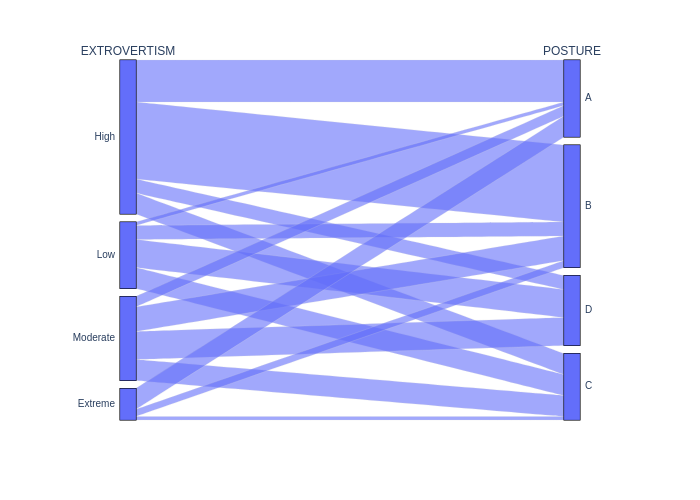

In [18]:
plot = px.parallel_categories(posture_personality_df, dimensions=['EXTROVERTISM', 'POSTURE'])
plot.show(renderer='png')

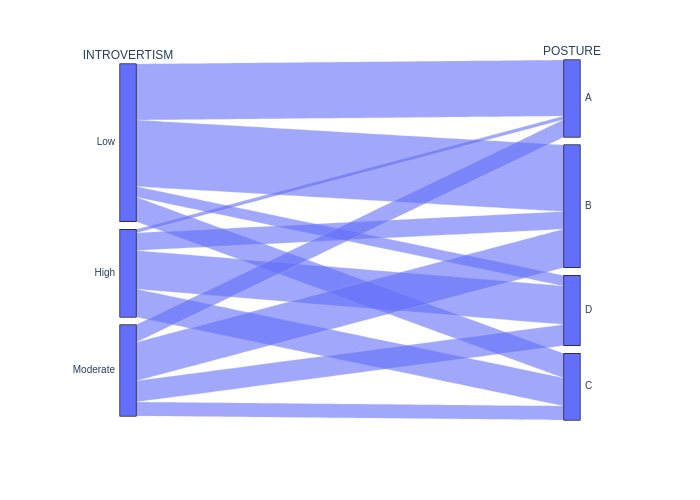

In [19]:
plot = px.parallel_categories(posture_personality_df, dimensions=['INTROVERTISM', 'POSTURE'])
plot.show(renderer='png')

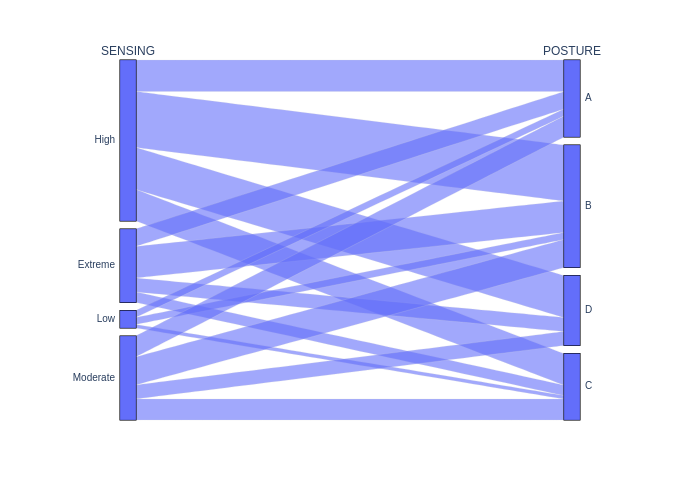

In [20]:
plot = px.parallel_categories(posture_personality_df, dimensions=['SENSING', 'POSTURE'])
plot.show(renderer='png')

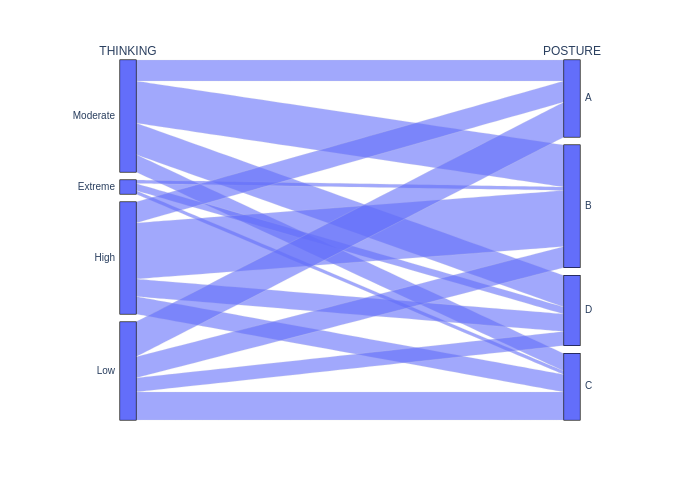

In [21]:
plot = px.parallel_categories(posture_personality_df, dimensions=['THINKING', 'POSTURE'])
plot.show(renderer='png')

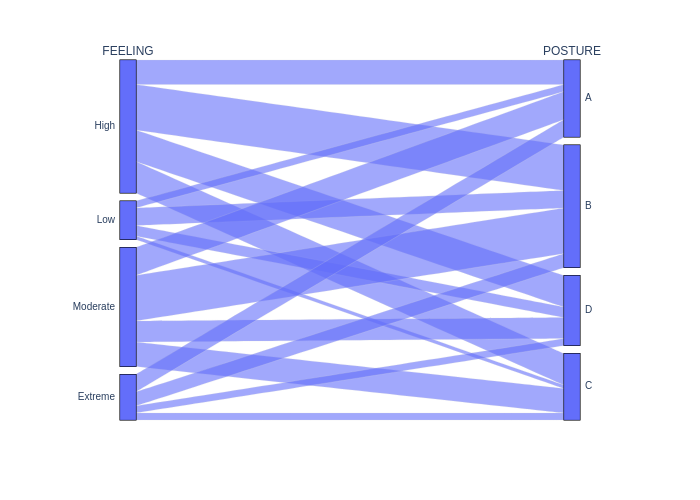

In [22]:
plot = px.parallel_categories(posture_personality_df, dimensions=['FEELING', 'POSTURE'])
plot.show(renderer='png')

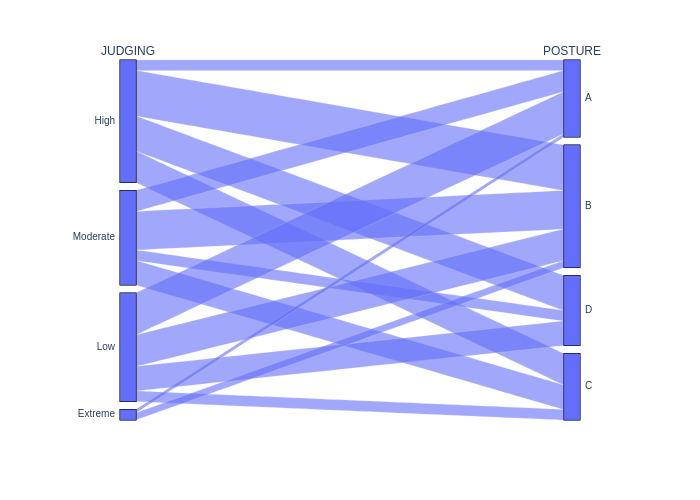

In [23]:
plot = px.parallel_categories(posture_personality_df, dimensions=['JUDGING', 'POSTURE'])
plot.show(renderer='png')

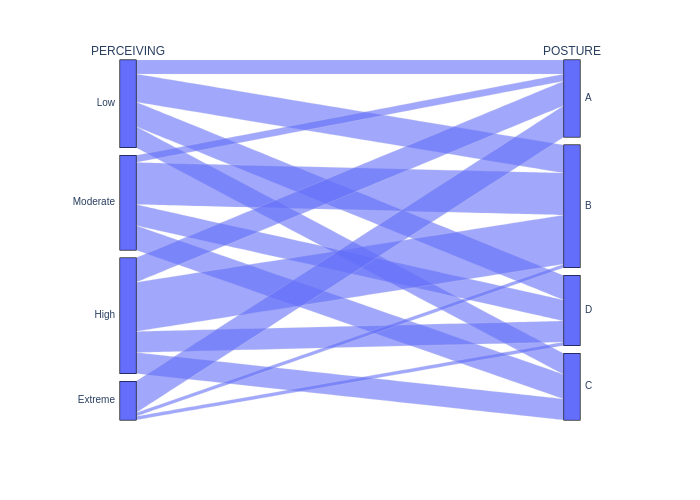

In [24]:
plot = px.parallel_categories(posture_personality_df, dimensions=['PERCEIVING', 'POSTURE'])
plot.show(renderer='png')

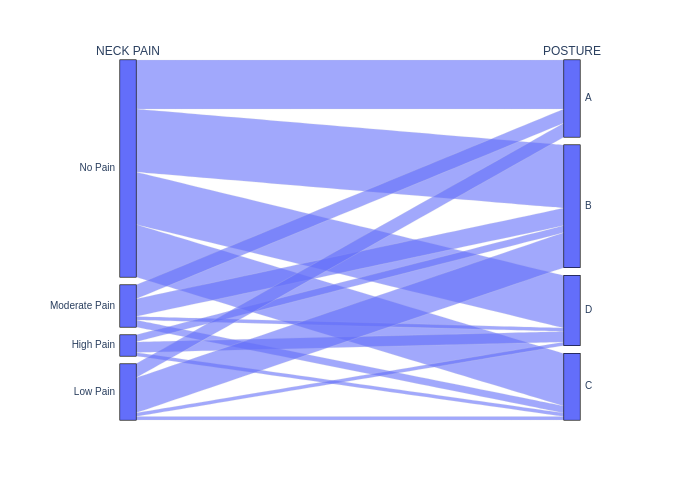

In [25]:
plot = px.parallel_categories(posture_personality_df, dimensions=['NECK PAIN', 'POSTURE'])
plot.show(renderer='png')

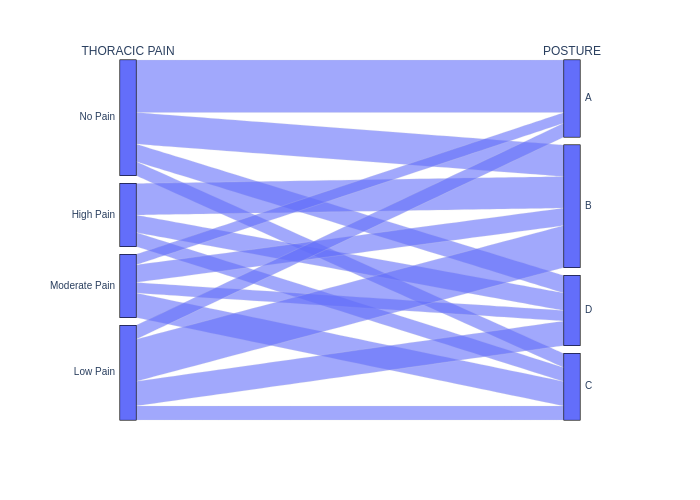

In [26]:
plot = px.parallel_categories(posture_personality_df, dimensions=['THORACIC PAIN', 'POSTURE'])
plot.show(renderer='png')

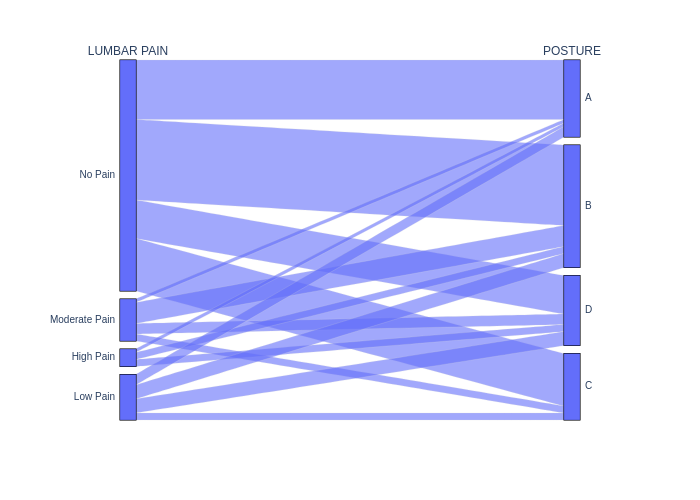

In [27]:
plot = px.parallel_categories(posture_personality_df, dimensions=['LUMBAR PAIN', 'POSTURE'])
plot.show(renderer='png')

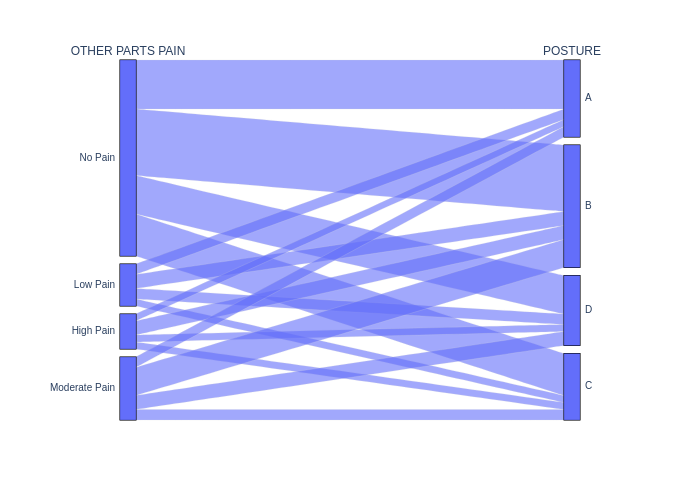

In [28]:
plot = px.parallel_categories(posture_personality_df, dimensions=['OTHER PARTS PAIN', 'POSTURE'])
plot.show(renderer='png')

Ao observamos os traços de personalidade individualmente não é possível perceber uma correlação entre personalidade e postura, iremos ver se é possível desenvolver um modelo que somados os traços de personlidade ira prever a postura do candidato.

## **4.0 Pré-processamento dos dados**

In [29]:
# Divisão entre atributos previsores e classe
X_posture_personality = posture_personality_df.iloc[:, [3,10,11,12,13,14,15,16,17]].values
y_posture_personality = posture_personality_df.iloc[:, -1].values

In [30]:
# Importando bibliotecas OneHot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Instanciando OneHotEncoder
oneHotEncoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,2,3,4,5,6,7,8])], remainder='passthrough')

# Encodando atributos previsores no formato OneHot
X_posture_personality = oneHotEncoder.fit_transform(X_posture_personality).toarray()

In [31]:
# Importando biblioteca de padronização
from sklearn.preprocessing import StandardScaler

# Instanciando StandartScaler
scaler = StandardScaler()

# Padronizando atributos previsores
X_posture_personality = scaler.fit_transform(X_posture_personality)

In [32]:
# Importando biblioteca LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instanciando LabelEncoder
labelEncoder = LabelEncoder()

# Encodando atributo alvo
y_posture_personality = labelEncoder.fit_transform(y_posture_personality)

## **5.0 Seleção do modelo**

In [33]:
scores = {}

### **Naive Bayes**

In [34]:
# Usaremos o GridSearchCV para fazer a validação cruzada e identificar os melhores parâmetros para cada modelo
from sklearn.model_selection import GridSearchCV

In [35]:
# Importando o modelo Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [36]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = {}

In [37]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=parameters, cv=10)

In [38]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

GridSearchCV(cv=10, estimator=GaussianNB(), param_grid={})

In [39]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

{}


In [40]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

25.000000000000007


In [41]:
scores['Naive Bays'] = [round(best_score, 2)]

### **Decision Tree**

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = { 'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,5,10]}

In [44]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv=10)

In [45]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [46]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}


In [47]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

41.77777777777778


In [48]:
scores['Decision Tree'] = [round(best_score, 2)]

### **Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = { 'criterion': ['gini', 'entropy'],
               'n_estimators': [10, 40 ,100, 150],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,5,10]}

In [51]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=10)

In [52]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 40, 100, 150]})

In [53]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [54]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

48.11111111111111


In [55]:
scores['Random Forest'] = [round(best_score, 2)]

### **K-Nearest Neighbour**

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = { 'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [58]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, cv=10)

In [59]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]})

In [60]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

{'n_neighbors': 20, 'p': 2}


In [61]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

45.888888888888886


In [62]:
scores['K-Nearest Neighbour'] = [round(best_score, 2)]

### **Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [65]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=10)

In [66]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [67]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}


In [68]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

31.333333333333336


In [69]:
scores['Logistic Regression'] = [round(best_score, 2)]

### **SVM**

In [70]:
from sklearn.svm import SVC

In [71]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [72]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=10)

In [73]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

KeyboardInterrupt: ignored

In [ ]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

In [ ]:
scores['SVM'] = [round(best_score, 2)]

In [ ]:
scores

### **Avaliação dos modelos**

In [ ]:
scores_df = pd.DataFrame(scores)
figure = plt.figure
plt.title('Score')
plot = sns.barplot(data=scores_df, orient='h', order=['Random Forest', 'K-Nearest Neighbour', 'SVM', 'Decision Tree', 'Logistic Regression', 'Naive Bays' ]);
for i in plot.patches:
  plot.annotate(i.get_width(), (i.get_width(), i.get_y() + i.get_height() / 2))
plot.set(xticklabels='')

Usando somente as colunas relacionadas a personalidade não foi possível criar um modelo com um alto nível de acerto nas previsões, então testaremos os modelos novamente usando também as colunas relacionadas as dores relatadas pelos candidatos da pesquisa.

## **6.0 Pré-processamento dos dados adicionando atributos relacionado a dores**

In [ ]:
# Divisão entre atributos previsores e classe, aqui adicionamos as colunas relacionadas as queixas de dores.

X_posture_personality = posture_personality_df.iloc[:, [3,5,6,7,10,11,12,13,14,15,16,17]].values
y_posture_personality = posture_personality_df.iloc[:, -1].values

In [ ]:
# Importando bibliotecas OneHot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Instanciando OneHotEncoder
oneHotEncoder = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [0,1,2,3,4,5,6,7,8,9,10,11])], remainder='passthrough')

# Encodando atributos previsores no formato OneHot
X_posture_personality = oneHotEncoder.fit_transform(X_posture_personality).toarray()

In [ ]:
# Importando biblioteca de padronização
from sklearn.preprocessing import StandardScaler

# Instanciando StandartScaler
scaler = StandardScaler()

# Padronizando atributos previsores
X_posture_personality = scaler.fit_transform(X_posture_personality)

In [ ]:
# Importando biblioteca LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instanciando LabelEncoder
labelEncoder = LabelEncoder()

# Encodando atributo alvo
y_posture_personality = labelEncoder.fit_transform(y_posture_personality)

## **7.0 Seleção do modelo com novos dados pré-processados**

### **Naiver Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = {}

In [ ]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=parameters, cv=10)

In [ ]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

In [ ]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

In [ ]:
scores['Naive Bays'] = [round(best_score, 2)]

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = { 'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,5,10]}

In [ ]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters, cv=10)

In [ ]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

In [ ]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

In [ ]:
scores['Decision Tree'] = [round(best_score, 2)]

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = { 'criterion': ['gini', 'entropy'],
               'n_estimators': [10, 40 ,100, 150],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,5,10]}

In [ ]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=10)

In [ ]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

In [ ]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

### **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = { 'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [ ]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, cv=10)

In [ ]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

In [ ]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

In [ ]:
scores['K-Nearest Neighbour'] = [round(best_score, 2)]

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, cv=10)

In [ ]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

In [ ]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

In [ ]:
scores['Logist Regression'] = [round(best_score, 2)]

### **SVM**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Passando parâmetros que serão testas pelo GridSearchCV
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
# Instanciando GridSearchCV
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters, cv=10)

In [ ]:
# Treinando modelo com os atributos teste e alvo
grid_search.fit(X_posture_personality, y_posture_personality)

In [ ]:
# Identificando os melhores parâmetros
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
# Retornando Nível de acertos das previsões
best_score = grid_search.best_score_
print(best_score * 100)

In [ ]:
scores['Naive Bays'] = [round(best_score, 2)]

### **Avaliação dos modelos**

In [ ]:
scores_df = pd.DataFrame(scores)
figure = plt.figure
plt.title('Score')
plot = sns.barplot(data=scores_df, orient='h', order=['Random Forest', 'K-Nearest Neighbour', 'SVM', 'Decision Tree', 'Logistic Regression', 'Naive Bays' ]);
for i in plot.patches:
  plot.annotate(i.get_width(), (i.get_width(), i.get_y() + i.get_height() / 2))
plot.set(xticklabels='')

### **8.0 Conclusão**

Mesmo adicionando as colunas relacionadas a dores aos modelos não foi possível criar um modelo com um bom nível de acertos o que indica que não existe correlação entre postura e pesonalidade, contudo o banco de dados utilizado neste projeto e pequeno com hapenas 97 candidatos o que não nos permite treinar nossos modelos de forma mais robusta.